In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Objective

A Taiwan-based bank wants to better predict the likelihood of default for its customers, as well as identify the key drivers that determine this likelihood. This would inform the issuer’s decisions on who to give a credit card to and what credit limit to provide. It would also help the bank have a better understanding of their current and potential customers, which would inform their future strategy, including their planning of offering targeted credit products to their customers. Our fundamental objective is to help the bank to improve its credit card services for the mutual benefit of customers and the business itself. Creating a human-interpretable solutionis emphasizedin each stage of the project


#  Introduction 

We presented validate heuristic approach to mine potential default accounts in advance where a risk probability is precomputed from all previous data and the risk probability for recent transactions are computed as soon they happen. Beside our heuristic approach, we also apply a recently proposed machine learning approach As a result, we find that these applied approaches outperform existing state-of-the-art approaches.

The achievement values are indeed to get the correct prediction score ,as we know there is one dependent and many in depends variables with some classes and with continuous or discrete frequency . At outset we have been trying to accomplish of Variable Identification, Univariate, Bivariate Analysis, Missing Values Imputation and Outliers Treatment in EDA part. Further we have performed hypotheses for some variable using chi square test to check their dependent relationship . In additional to this  we have created  some dummy variables and subsequently we have checked multicollinearity , KMO test and factor analysis before  processing to final model preparation for our analysis .


##### Importing the data set 
The data set has 30000 observations with 25 variables in this dataset comprises of demographic variables (gender, education level, marriage status, and age) and financial variables of 6-months worth of payment data from April 2005 to September 2005 (amount of given credit, monthly repayment statuses, monthly amount of bill statements, and monthly amount of previous payments). 
Limit balance and age are continuous frequencies and other variable are bionomical categories . The Payment history from April to September2005 
Variable X12 to X17 is bill statement amount ,all are carrying amount values X18 to X23 is carried out the previous amount paid by the customer shows in descret frequency
We have renamed the column names to identify easily the variable names 


In [109]:
dataset = pd.read_excel('C:/Users/SuprasannaPradhan/Documents/My Files/Great Lakes Projects/Capstone Project TCD/Taiwan-Customer defaults.xls',header=1)
#dataset = dataset.sample(n=2000,replace =False,random_state=1)


In [110]:
dataset.head(10)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [111]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [112]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000



There are 30000 distinct credit card clients.

The average value for the amount of credit card limit is 167484.32 The standard deviation is unusually large, max value being 100000.00

Education Level is mostly graduate school and university.

Most of the clients are either married or single .

Average age is 35.5 years, with a standard deviation of 9.2

As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).


In [113]:
dataset.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [114]:
dataset.isnull().sum()


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [115]:
dataset['SEX'].value_counts(dropna=False)


2    18112
1    11888
Name: SEX, dtype: int64

In [116]:
dataset['EDUCATION'].value_counts(dropna=False)

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

###### We have changed here some vairbale names 

In [117]:
dataset = dataset.rename(columns={'default payment next month':'def_pay', 
                        'PAY_0': 'PAY_1'})
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Text(0.5, 1.0, 'SEX v/s COUNT')

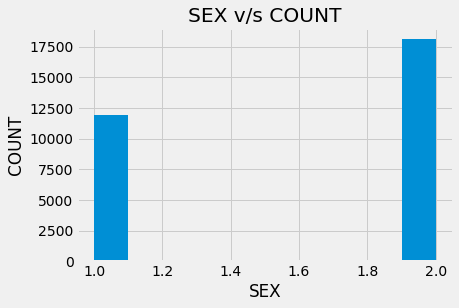

In [118]:
plt.style.use('fivethirtyeight')
dataset['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX v/s COUNT')

Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

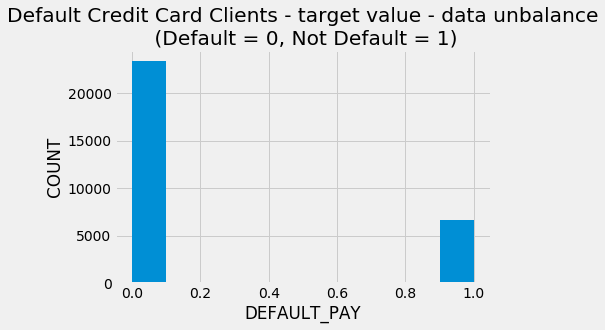

In [119]:
plt.style.use('fivethirtyeight')
dataset['def_pay'].hist()
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

Text(0.5, 1.0, 'EDUCATION v/s COUNT')

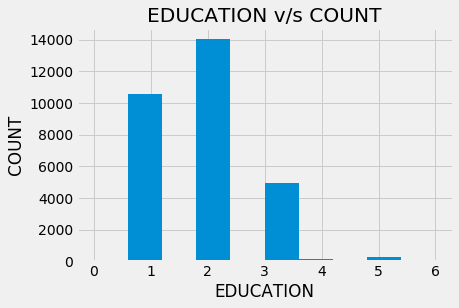

In [120]:
plt.style.use('fivethirtyeight')
dataset['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION v/s COUNT')

Text(0.5, 1.0, 'MARRIAGE v/s COUNT')

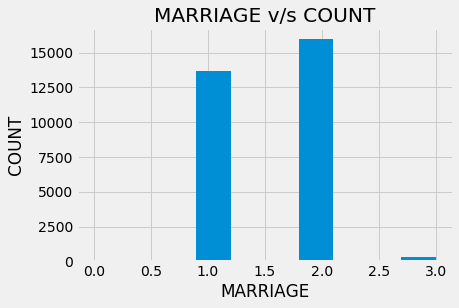

In [121]:
plt.style.use('fivethirtyeight')
dataset['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('MARRIAGE v/s COUNT')

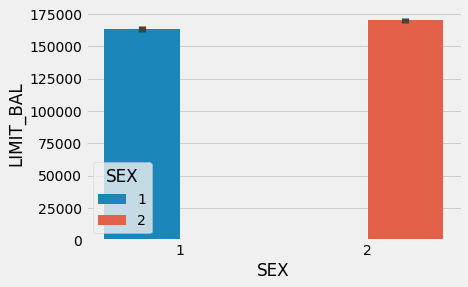

In [122]:
sns.barplot(x='SEX',y='LIMIT_BAL',data=dataset,hue='SEX')

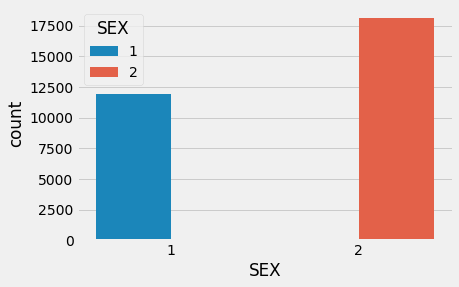

In [123]:
sns.countplot(x='SEX',data=dataset,hue = 'SEX')

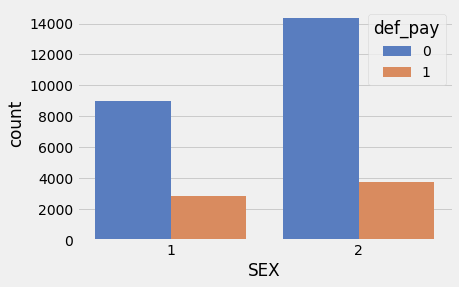

In [124]:
sns.countplot(x='SEX', data=dataset,hue="def_pay", palette="muted")

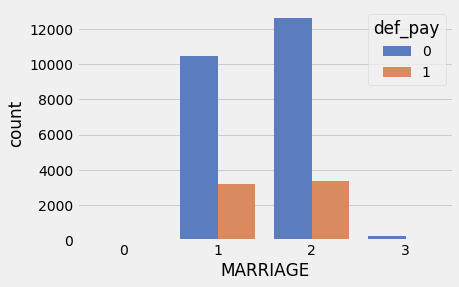

In [125]:
g=sns.countplot(x="MARRIAGE", data=dataset,hue="def_pay", palette="muted")



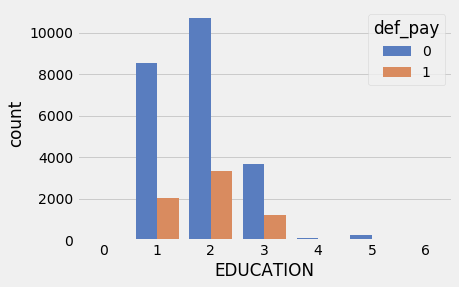

In [126]:
g=sns.countplot(x="EDUCATION", data=dataset,hue="def_pay", palette="muted")

In [127]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

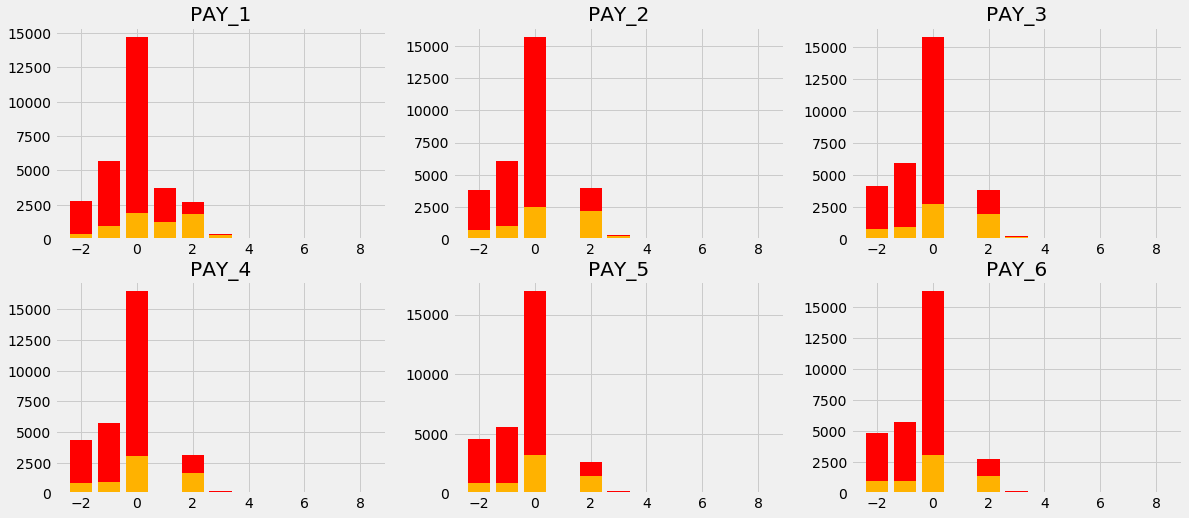

In [128]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = dataset[pay_status_columns[i]].value_counts()
    x = dataset[pay_status_columns[i]][(dataset['def_pay']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
   


    
plt.show()

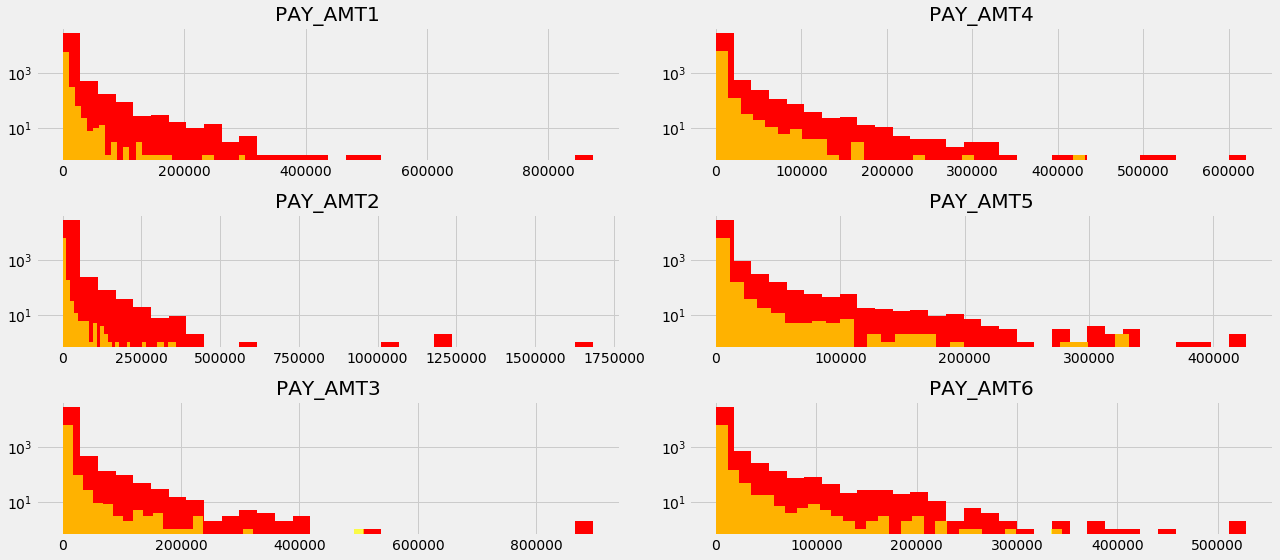

In [129]:
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(dataset[pay_amt_columns[i]], 30, color ='red')
    ax[row,col].hist(dataset[pay_amt_columns[i]][(dataset['def_pay']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

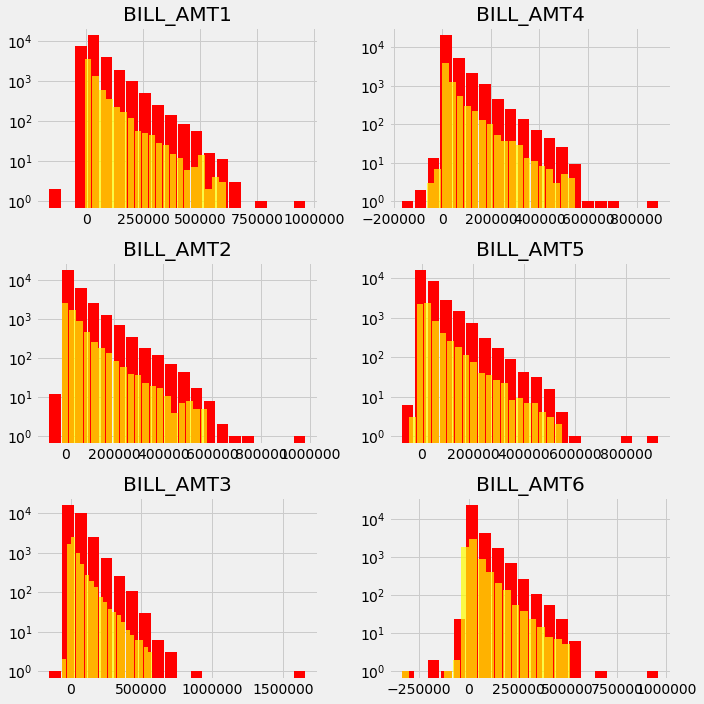

In [130]:
bill_atm_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(dataset[bill_atm_columns[i]], 20,rwidth=0.9, color ='red')
    ax[row,col].hist(dataset[bill_atm_columns[i]][(dataset['def_pay']==1)],20,rwidth=0.9,color='yellow',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()


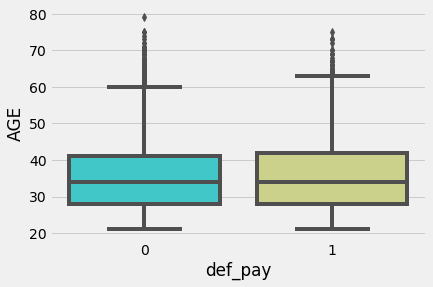

In [131]:
sns.boxplot(x='def_pay',y='AGE',data=dataset,palette='rainbow')

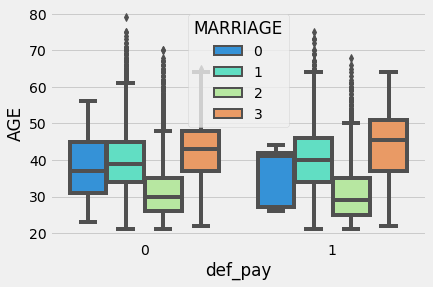

In [132]:
sns.boxplot(x='def_pay',hue='MARRIAGE', y='AGE',data=dataset,palette="rainbow")

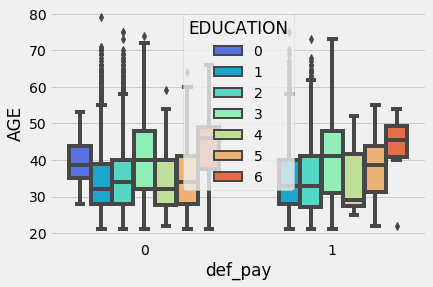

In [133]:
sns.boxplot(x='def_pay',hue='EDUCATION', y='AGE',data=dataset,palette="rainbow" )


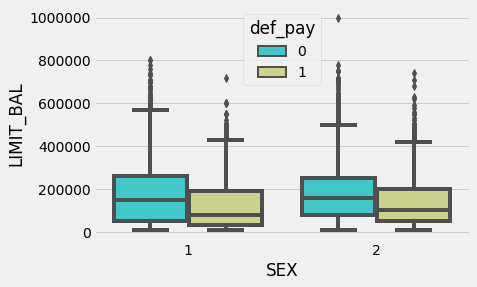

In [134]:
sns.boxplot(x='SEX',hue='def_pay', y='LIMIT_BAL',data=dataset,palette="rainbow")

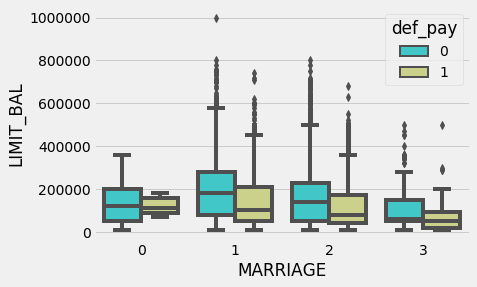

In [135]:
sns.boxplot(x='MARRIAGE',hue='def_pay', y='LIMIT_BAL',data=dataset,palette="rainbow")

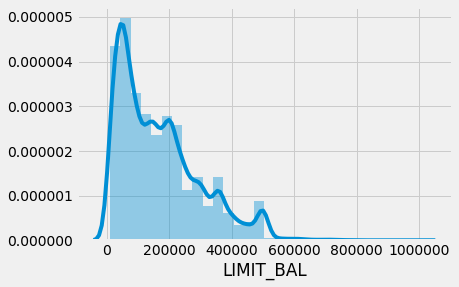

In [136]:
sns.distplot(dataset['LIMIT_BAL'],kde=True,bins=30)

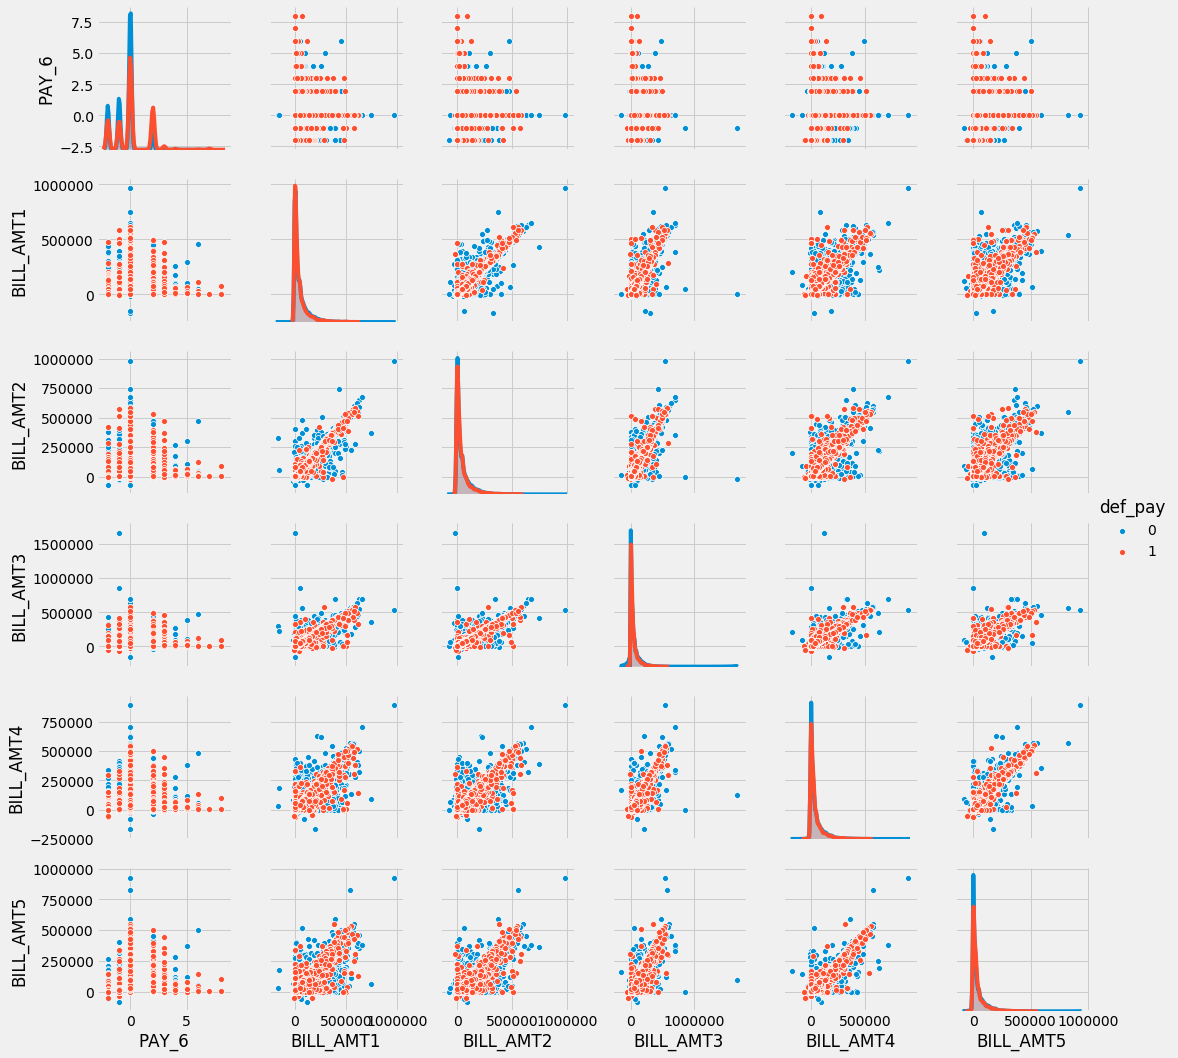

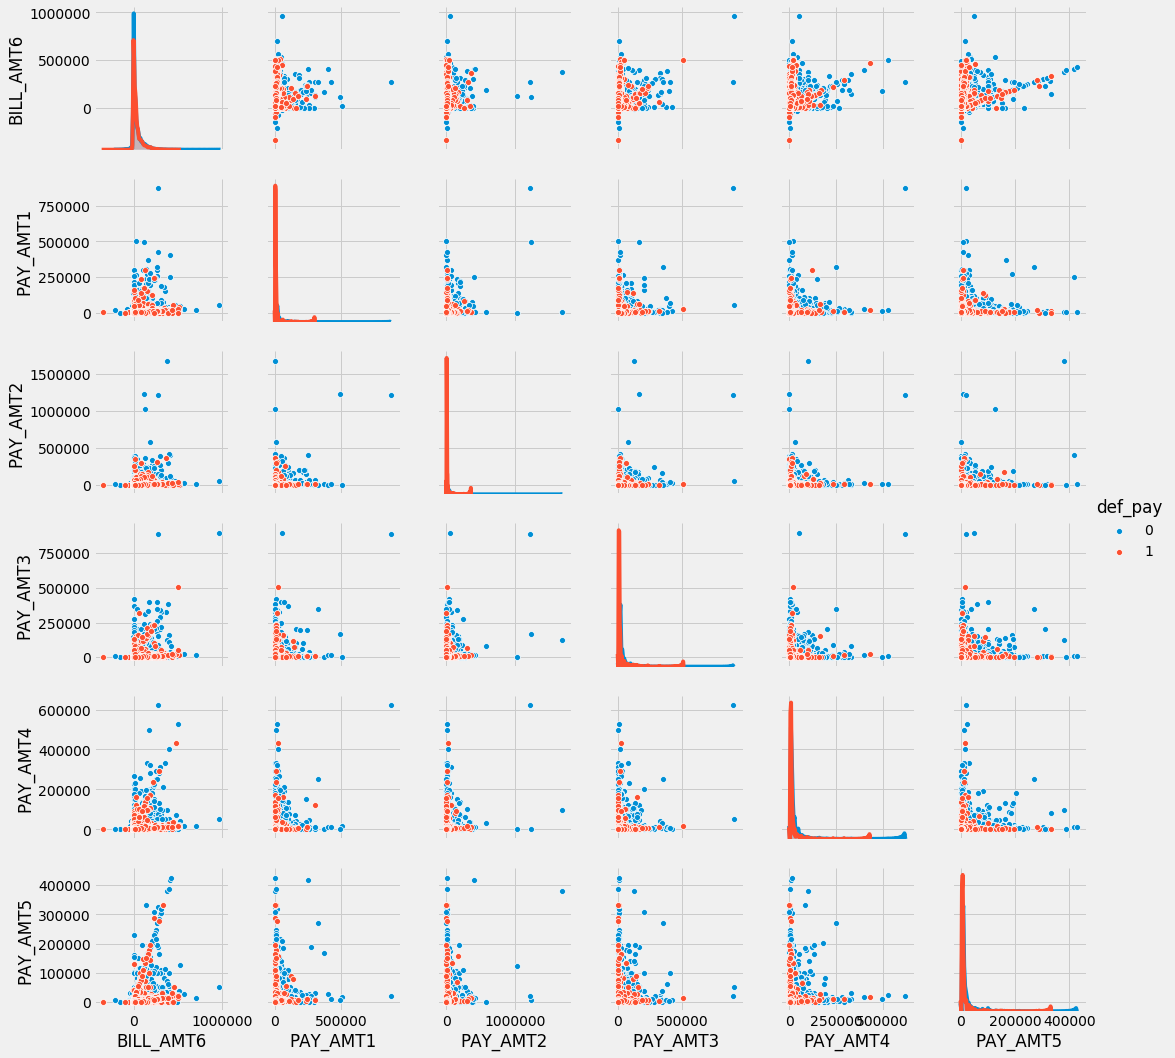

In [137]:
# plot columns with similar names to check the correlation

sns.pairplot(dataset, vars=dataset.columns[11:17], kind='scatter',hue= 'def_pay')
sns.pairplot(dataset, vars=dataset.columns[17:23],hue = 'def_pay')


In [138]:
correlation = dataset.corr()

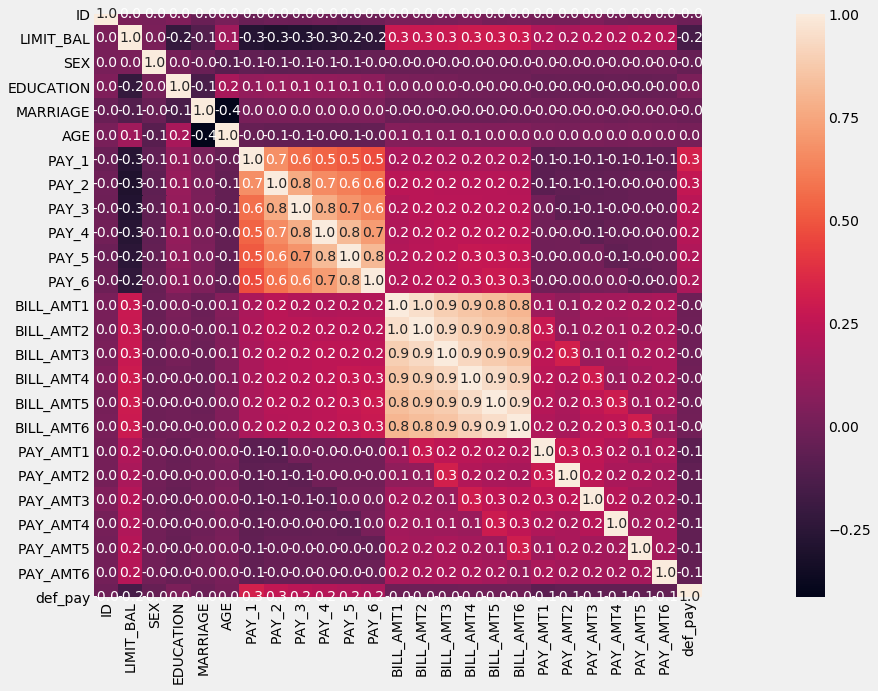

In [139]:
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )

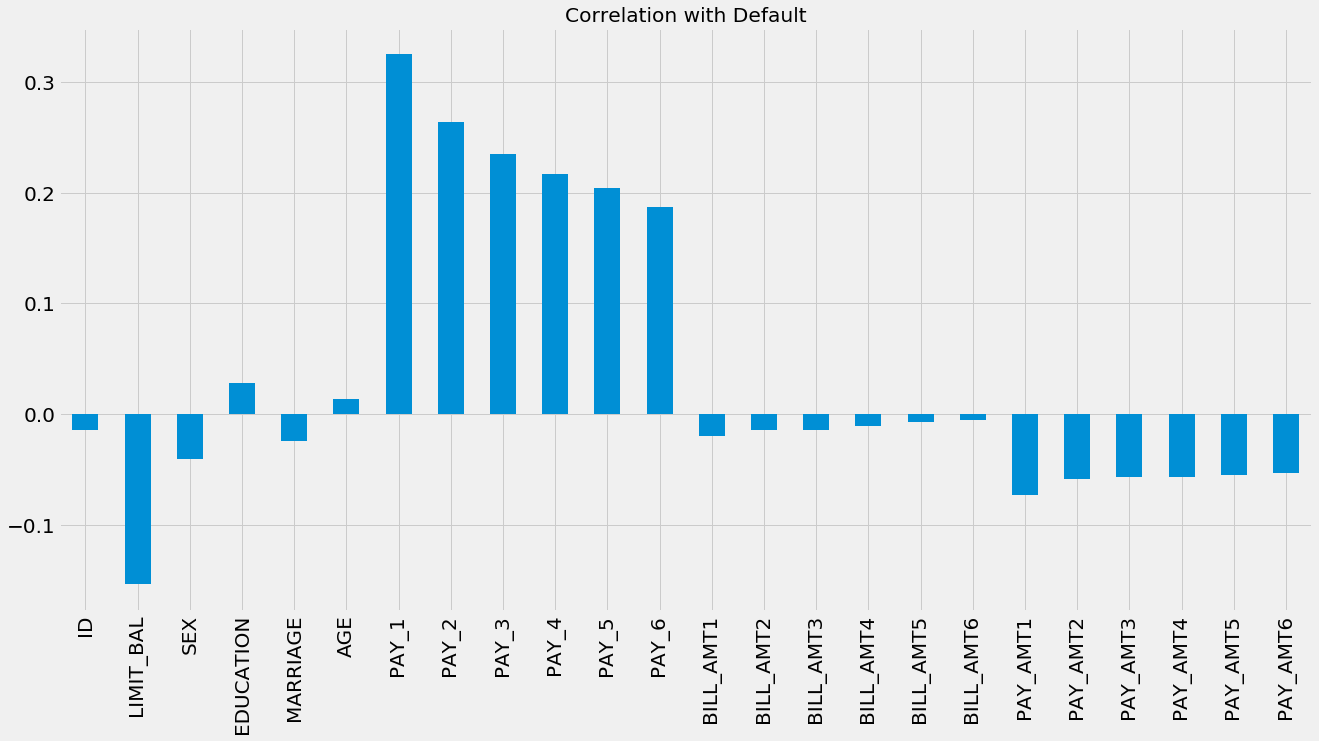

In [140]:
X = dataset.drop(['def_pay'],axis=1)
X.corrwith(dataset['def_pay']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

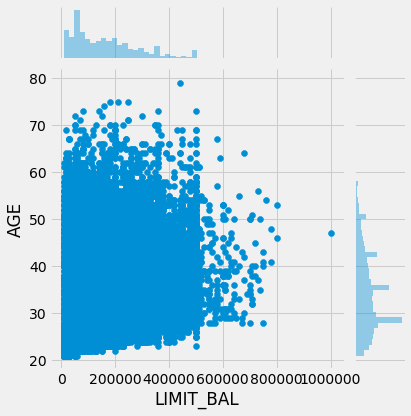

In [141]:
sns.jointplot(x='LIMIT_BAL',y='AGE',data=dataset,kind="scatter")

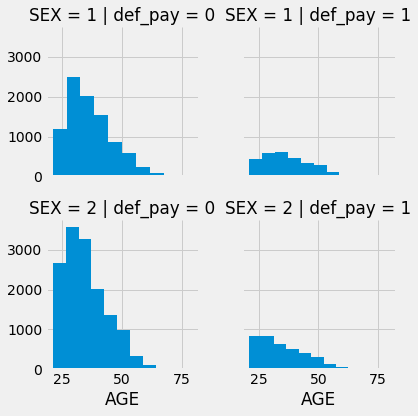

In [142]:
g = sns.FacetGrid(dataset, col = 'def_pay', row = 'SEX')
g.map(plt.hist, 'AGE')

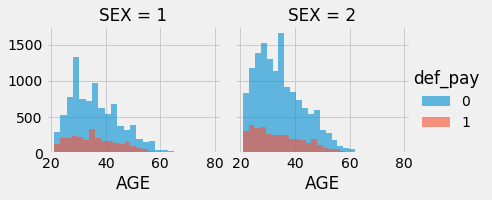

In [143]:
g = sns.FacetGrid(dataset, col='SEX', hue='def_pay')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

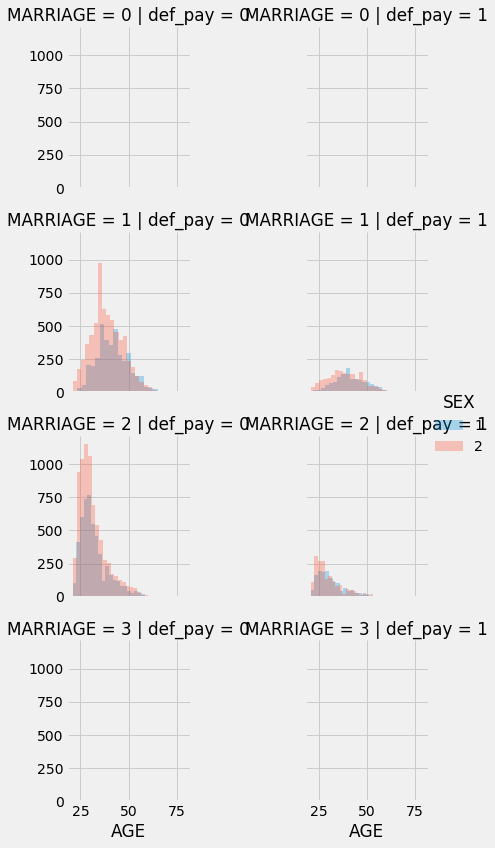

In [144]:
g = sns.FacetGrid(dataset, col='def_pay', row= "MARRIAGE", hue='SEX')
g.map(plt.hist, 'AGE', alpha=0.3, bins=25) 
g.add_legend()

In [145]:
fil = (dataset.EDUCATION == 5) | (dataset.EDUCATION == 6) | (dataset.EDUCATION == 0)
dataset.loc[fil, 'EDUCATION'] = 4
dataset.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [146]:
dataset['EDUCATION'].value_counts(dropna = False)

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [147]:
dataset.loc[dataset.MARRIAGE == 0, 'MARRIAGE'] = 3
dataset.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [148]:
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [149]:
fil = (dataset.PAY_1 == -1) | (dataset.PAY_1==-2)
dataset.loc[fil,'PAY_1']=0
dataset.PAY_1.value_counts()
fil = (dataset.PAY_2 == -1) | (dataset.PAY_2==-2)
dataset.loc[fil,'PAY_2']=0
dataset.PAY_2.value_counts()
fil = (dataset.PAY_3 == -1) | (dataset.PAY_3==-2)
dataset.loc[fil,'PAY_3']=0
dataset.PAY_3.value_counts()
fil = (dataset.PAY_4 == -1) | (dataset.PAY_4==-2)
dataset.loc[fil,'PAY_4']=0
dataset.PAY_4.value_counts()
fil = (dataset.PAY_5 == -1) | (dataset.PAY_5==-2)
dataset.loc[fil,'PAY_5']=0
dataset.PAY_5.value_counts()
fil = (dataset.PAY_6 == -1) | (dataset.PAY_6==-2)
dataset.loc[fil,'PAY_6']=0
dataset.PAY_6.value_counts()

0    26921
2     2766
3      184
4       49
7       46
6       19
5       13
8        2
Name: PAY_6, dtype: int64

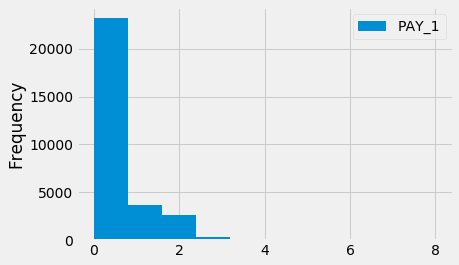

In [150]:
dataset.plot(y='PAY_1',kind='hist')
plt.legend()
plt.show()

In [151]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
def_pay      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [152]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

In [153]:
dataset[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [154]:
dataset[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [155]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

In [156]:
dataset.columns = dataset.columns.map(str.lower)

In [157]:
dataset.head()

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [158]:
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']
dataset[col_to_norm] = dataset[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

In [159]:
dataset.head(10)

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
0,1,-1.136720,2,2,1,-1.246020,2,2,0,0,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,2,-0.365981,2,2,2,-1.029047,0,2,0,0,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,3,-0.597202,2,2,2,-0.161156,0,0,0,0,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,4,-0.905498,2,2,1,0.164303,0,0,0,0,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,5,-0.905498,1,2,1,2.334029,0,0,0,0,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0
5,6,-0.905498,1,1,2,0.164303,0,0,0,0,...,-0.371029,-0.340357,-0.316487,-0.191003,-0.178215,-0.259486,-0.244230,-0.248683,-0.248381,0
6,7,2.562830,1,1,2,-0.703588,0,0,0,0,...,7.762727,7.281574,7.305617,2.978712,1.479085,1.861472,0.983852,0.585848,0.481207,0
7,8,-0.520128,2,2,2,-1.354506,0,0,0,0,...,-0.669062,-0.665674,-0.643203,-0.318999,-0.230905,-0.296801,-0.270976,-0.203716,-0.206642,0
8,9,-0.211833,2,3,1,-0.812074,0,0,2,0,...,-0.482684,-0.469082,-0.590276,-0.140952,-0.256990,-0.272265,-0.244230,-0.248683,-0.237130,0
9,10,-1.136720,1,3,2,-0.052670,0,0,0,0,...,-0.672497,-0.449114,-0.419118,-0.341942,-0.256990,-0.296801,0.522212,-0.240697,-0.293382,0


In [160]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [161]:
X_train.shape,X_test.shape

((21000, 24), (9000, 24))

# Logistic Regression 

##### In Logistic Regression, we wish to model a dependent variable(Y) in terms of one or more independent variables(X). It is a method for classification. This algorithm is used for the dependent variable that is Categorical. Y is modeled using a function that gives output between 0 and 1 for all values of X. In Logistic Regression, the Sigmoid (aka Logistic) Function is used

In [200]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [201]:
y_pred = logmodel.predict(X_test)

In [202]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_rt = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_rt

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.803111,0.664265,0.2305,0.342242,0.598607


# Stochastic Gradient Descent

##### Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression.It is on of the Gradient Descent Algorithm.It uses only a single example (a batch size of 1) per iteration. Given enough iterations, SGD works but is very noisy. The term "stochastic" indicates that the one example comprising each batch is chosen at random.


In [203]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=1)
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=1, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [204]:
y_pred = sgd.predict(X_test)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_sgd = pd.DataFrame([['Stochastic Gradient Descent', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_rt= model_rt.append(model_sgd, ignore_index = True)
model_rt

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.803111,0.664265,0.2305,0.342242,0.598607
1,Stochastic Gradient Descent,0.782222,0.515385,0.3350,0.406061,0.622500


# K-Nearest Neighbour

##### KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry.

###### KNN focuses on easy implementation and good performance at the cost of computational time, but in our case the size of the dataset is considerably small so we can apply KNN.

##### We can implement a KNN model by following the below steps:

    Load the data
    Initialise the value of k
    For getting the predicted class, iterate from 1 to total number of training data points
    Calculate the distance between test data and each row of training data. Here we will use Euclidean distance as our distance metric since it’s the most popular method. The other metrics that can be used are Chebyshev, cosine, etc.
    Sort the calculated distances in ascending order based on distance values
    Get top k rows from the sorted array
    Get the most frequent class of these rows
    Return the predicted class

Let's go ahead and use the elbow method to pick a good K Value!

Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.


In [205]:
from sklearn.neighbors import KNeighborsClassifier

In [206]:
error_rate = []
for i in range(1,40):
    
          knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
          knn.fit(X_train,y_train)
          pred_i = knn.predict(X_test)
          error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

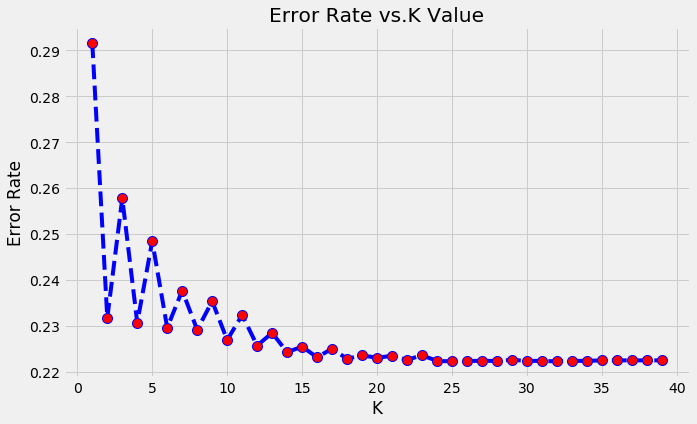

In [207]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color ='blue',linestyle='dashed',marker='o',markerfacecolor='red', markersize='10')
plt.title('Error Rate vs.K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [208]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [209]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [210]:
y_pred = knn.predict(X_test)

In [211]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_knn = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_rt = model_rt.append(model_knn, ignore_index = True)
model_rt

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.803111,0.664265,0.2305,0.342242,0.598607
1,Stochastic Gradient Descent,0.782222,0.515385,0.3350,0.406061,0.622500
2,K-Nearest Neighbour,0.762333,0.309589,0.0565,0.095560,0.510250


# Support Vector Machine

##### SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems.The algorithm creates a line or a hyperplane which separates the data into classes using different kernel tricks like = 'linear','rbf' (gaussian).

##### Thus SVM tries to make a decision boundary in such a way that the separation between the two classes(that street) is as wide as possible.


In [212]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [213]:
# Predicting the Test set results
y_pred = scv.predict(X_test)

In [214]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

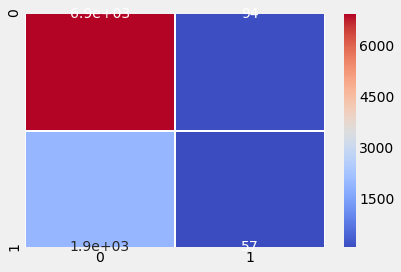

In [215]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')

In [216]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_svm = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_rt = model_rt.append(model_svm, ignore_index = True)
model_rt

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.803111,0.664265,0.2305,0.342242,0.598607
1,Stochastic Gradient Descent,0.782222,0.515385,0.3350,0.406061,0.622500
2,K-Nearest Neighbour,0.762333,0.309589,0.0565,0.095560,0.510250
3,Support Vector Machine,0.773667,0.377483,0.0285,0.052999,0.507536


# Gaussian Naive Bayes

In [217]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [218]:
y_pred = naive_bayes.predict(X_test)

In [219]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [220]:
cm

array([[5927, 1073],
       [ 935, 1065]], dtype=int64)

In [221]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_nb= pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_rt = model_rt.append(model_nb, ignore_index = True)
model_rt

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.803111,0.664265,0.2305,0.342242,0.598607
1,Stochastic Gradient Descent,0.782222,0.515385,0.3350,0.406061,0.622500
2,K-Nearest Neighbour,0.762333,0.309589,0.0565,0.095560,0.510250
3,Support Vector Machine,0.773667,0.377483,0.0285,0.052999,0.507536
4,Gaussian Naive Bayes,0.776889,0.498129,0.5325,0.514741,0.689607


# Decision Tree Classification

In [222]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)

In [223]:
dct.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [224]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [225]:
cm

array([[5927, 1073],
       [ 935, 1065]], dtype=int64)

In [226]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_dt = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_rt = model_rt.append(model_dt, ignore_index = True)
model_rt

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.803111,0.664265,0.2305,0.342242,0.598607
1,Stochastic Gradient Descent,0.782222,0.515385,0.3350,0.406061,0.622500
2,K-Nearest Neighbour,0.762333,0.309589,0.0565,0.095560,0.510250
3,Support Vector Machine,0.773667,0.377483,0.0285,0.052999,0.507536
4,Gaussian Naive Bayes,0.776889,0.498129,0.5325,0.514741,0.689607
5,Decision Tree Classifier,0.776889,0.498129,0.5325,0.514741,0.689607


# Random Forest 

In [227]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)

In [228]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [229]:
y_pred = rfc.predict(X_test)

In [230]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[6624,  376],
       [1292,  708]], dtype=int64)

In [231]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_rf = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

model_rt = model_rt.append(model_rf, ignore_index = True)
model_rt

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.803111,0.664265,0.2305,0.342242,0.598607
1,Stochastic Gradient Descent,0.782222,0.515385,0.3350,0.406061,0.622500
2,K-Nearest Neighbour,0.762333,0.309589,0.0565,0.095560,0.510250
3,Support Vector Machine,0.773667,0.377483,0.0285,0.052999,0.507536
4,Gaussian Naive Bayes,0.776889,0.498129,0.5325,0.514741,0.689607
5,Decision Tree Classifier,0.776889,0.498129,0.5325,0.514741,0.689607
6,Random tree Classifier,0.814667,0.653137,0.3540,0.459144,0.650143


# XGBOOST classifier

In [232]:
import sys
!{sys.executable} -m pip install xgboost

In [233]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [234]:
y_pred =xgb.predict(X_test)

In [235]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[6670,  330],
       [1304,  696]], dtype=int64)

In [270]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_xb = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_rt = model_rt.append(model_xb, ignore_index = True)
model_rt

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.803111,0.664265,0.2305,0.342242,0.598607
1,Stochastic Gradient Descent,0.782222,0.515385,0.3350,0.406061,0.622500
2,K-Nearest Neighbour,0.762333,0.309589,0.0565,0.095560,0.510250
3,Support Vector Machine,0.773667,0.377483,0.0285,0.052999,0.507536
4,Gaussian Naive Bayes,0.776889,0.498129,0.5325,0.514741,0.689607
5,Decision Tree Classifier,0.776889,0.498129,0.5325,0.514741,0.689607
6,Random tree Classifier,0.814667,0.653137,0.3540,0.459144,0.650143
7,XGBOOST Classifier,0.818444,0.678363,0.3480,0.460013,0.650429
8,XGBOOST Classifier,0.818444,0.678363,0.3480,0.460013,0.650429
9,XGBOOST Classifier,0.818444,0.678363,0.3480,0.460013,0.650429


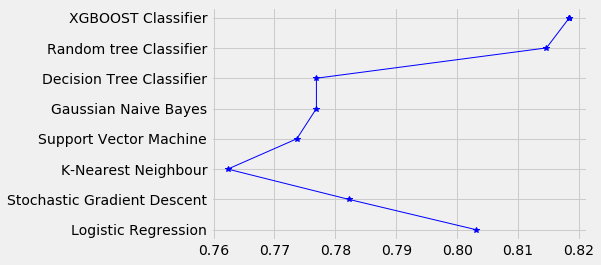

In [272]:
plt.plot('Accuracy','Model', data= model_rt, marker='*', color='blue',linewidth=1)


#####  The best models are XGBOOST Classifier, Random tree Classifier, Logistic Regression , by which we  predicted with  81 %,81% and 80% accuracy, whether a customer is likely to default next month. Whereas K-Nearest Neighbour method can 76%  of lesser accuracy .
#####   The strongest predictors of default are the PAY_X (ie the repayment status in previous months), the LIMIT_BAL & the PAY_AMTX (amount paid in previous months).
#####  We have seen also that being Female, More educated, Single and between 30-40years old means a customer is more likely to make payments on time.

